# Load Dataset

In [1]:
!pip install gdown
!mkdir "Dataset"

In [2]:
!gdown "1pVAKnlFOCvaxivfTKRYJ9Gc-lykfmUWi" -O "Praktikum_NIM_Ganjil.zip"
!unzip "Praktikum_NIM_Ganjil.zip" -d "Dataset/"

Downloading...
From: https://drive.google.com/uc?id=1pVAKnlFOCvaxivfTKRYJ9Gc-lykfmUWi
To: /content/Praktikum_NIM_Ganjil.zip
100% 2.10M/2.10M [00:00<00:00, 17.5MB/s]
Archive:  Praktikum_NIM_Ganjil.zip
   creating: Dataset/Praktikum_NIM_Ganjil/
   creating: Dataset/Praktikum_NIM_Ganjil/Beagle/
  inflating: Dataset/Praktikum_NIM_Ganjil/Beagle/Beagle_1.jpg  
  inflating: Dataset/Praktikum_NIM_Ganjil/Beagle/Beagle_10.jpg  
  inflating: Dataset/Praktikum_NIM_Ganjil/Beagle/Beagle_100.jpg  
  inflating: Dataset/Praktikum_NIM_Ganjil/Beagle/Beagle_11.jpg  
  inflating: Dataset/Praktikum_NIM_Ganjil/Beagle/Beagle_12.jpg  
  inflating: Dataset/Praktikum_NIM_Ganjil/Beagle/Beagle_13.jpg  
  inflating: Dataset/Praktikum_NIM_Ganjil/Beagle/Beagle_14.jpg  
  inflating: Dataset/Praktikum_NIM_Ganjil/Beagle/Beagle_15.jpg  
  inflating: Dataset/Praktikum_NIM_Ganjil/Beagle/Beagle_16.jpg  
  inflating: Dataset/Praktikum_NIM_Ganjil/Beagle/Beagle_17.jpg  
  inflating: Dataset/Praktikum_NIM_Ganjil/Beagle/Beagle_1

# Model

In [3]:
import os
import pathlib

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from tensorflow import keras
from keras.layers import RandomFlip, RandomRotation, RandomZoom, Rescaling, Conv2D, BatchNormalization, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

## Preprocessing

In [4]:
tf.random.set_seed(42)
np.random.seed(42)

IMG_HEIGHT, IMG_WIDTH = 300, 300
BATCH_SIZE = 32
NUM_CLASSES = 5
CLASSES = ["Beagle", "Bulldog", "German_Shepherd", "Labrador_Retriever", "Yorkshire_Terrier"]

In [5]:
train_generator = tf.keras.utils.image_dataset_from_directory(
   'Dataset/Praktikum_NIM_Ganjil',
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size= (IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
)

validation_generator = tf.keras.utils.image_dataset_from_directory(
    'Dataset/Praktikum_NIM_Ganjil',
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size= (IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
)

Found 491 files belonging to 5 classes.
Using 393 files for training.
Found 491 files belonging to 5 classes.
Using 98 files for validation.


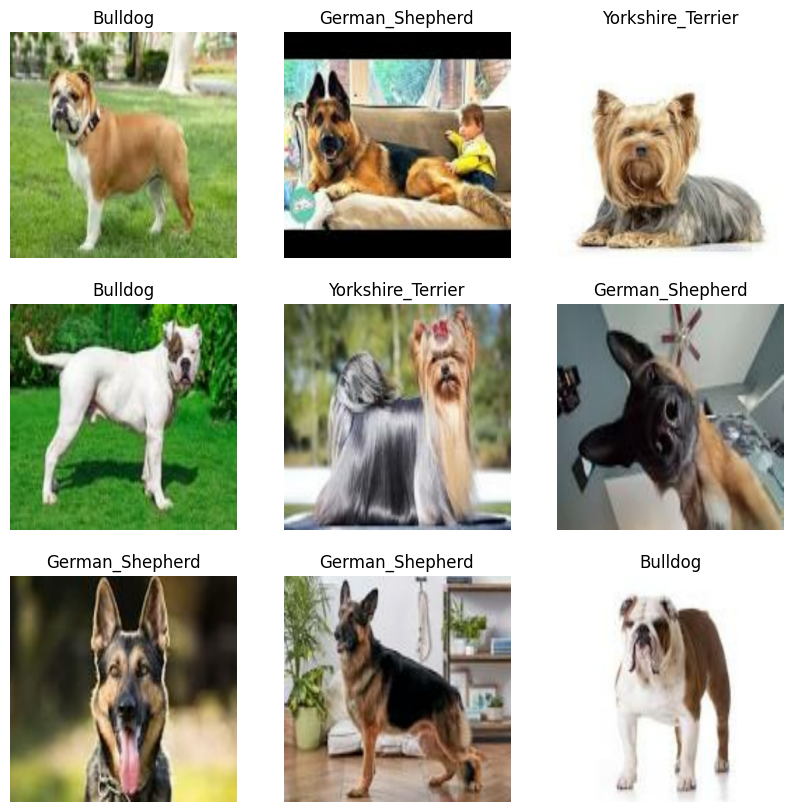

In [6]:
plt.figure(figsize=(10, 10))
for images, labels in train_generator.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(CLASSES[labels[i]])
    plt.axis("off")

## Augmentasi Model

In [7]:
model = Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.2),
    RandomZoom(0.2),
    Rescaling(1./255, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    GlobalAveragePooling2D(),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ random_flip (RandomFlip)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_rotation (RandomRotation)     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_zoom (RandomZoom)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuil

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(train_generator, epochs=50, batch_size=64, validation_data=validation_generator)

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 17s 374ms/step - accuracy: 0.2932 - loss: 1.6501 - val_accuracy: 0.2245 - val_loss: 1.6086
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 235ms/step - accuracy: 0.3825 - loss: 1.4447 - val_accuracy: 0.2041 - val_loss: 1.6042
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 227ms/step - accuracy: 0.4665 - loss: 1.2927 - val_accuracy: 0.1939 - val_loss: 1.6026
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 240ms/step - accuracy: 0.4733 - loss: 1.2460 - val_accuracy: 0.1939 - val_loss: 1.6062
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 227ms/step - accuracy: 0.5413 - loss: 1.1063 - val_accuracy: 0.1939 - val_loss: 1.6163
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 226ms/step - accuracy: 0.5947 - loss: 1.0939 - val_accuracy: 0.1939 - val_loss: 1.6274
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 239ms/step - accuracy: 0.5898 - loss: 1.0514 - val_accuracy: 0.1939 - val_loss: 1.6524
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 231ms/step - accuracy: 0.5980 - loss: 1.0341 - val_accuracy: 

In [11]:
loss, accuracy = model.evaluate(validation_generator)
print('Test accuracy :', accuracy)
print('Test loss :', loss)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.7510 - loss: 0.5579
Test accuracy : 0.7551020383834839
Test loss : 0.5488014817237854


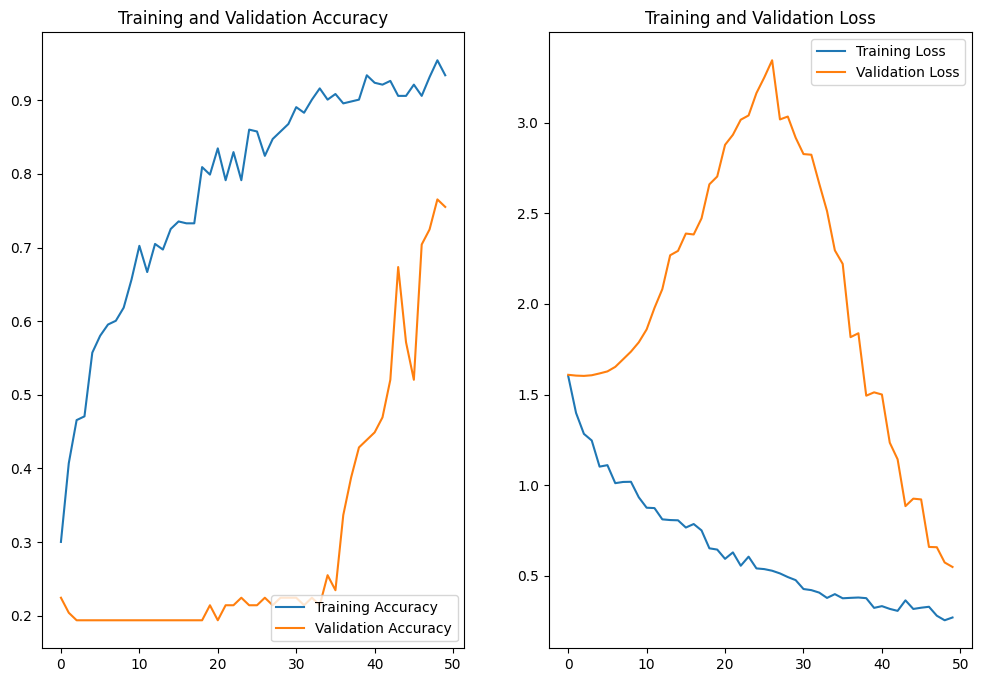

In [12]:
# Plot akurasi dan loss pelatihan dan validasi
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
y_true = []
y_pred = []

for images, labels in validation_generator:
    batch_predictions = model.predict(images)
    batch_pred_labels = np.argmax(batch_predictions, axis=1)
    y_true.extend(labels.numpy())
    y_pred.extend(batch_pred_labels)

y_true = np.array(y_true)
y_pred = np.array(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step


In [ ]:
print(classification_report(y_true, y_pred, target_names=CLASSES))

                    precision    recall  f1-score   support

            Beagle       1.00      0.91      0.95        22
           Bulldog       1.00      1.00      1.00        16
   German_Shepherd       1.00      0.94      0.97        16
Labrador_Retriever       0.93      1.00      0.96        25
 Yorkshire_Terrier       0.95      1.00      0.97        19

          accuracy                           0.97        98
         macro avg       0.98      0.97      0.97        98
      weighted avg       0.97      0.97      0.97        98

